In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load the dataset
file_path = r'C:\Users\aisho\OneDrive\Desktop\archive (1)\bbc_data.csv'
data = pd.read_csv(file_path)

In [4]:

# 1. Data Exploration
print("Data Sample:")
print(data.head())


Data Sample:
                                                data         labels
0  Musicians to tackle US red tape  Musicians gro...  entertainment
1  U2s desire to be number one  U2, who have won ...  entertainment
2  Rocker Doherty in on-stage fight  Rock singer ...  entertainment
3  Snicket tops US box office chart  The film ada...  entertainment
4  Oceans Twelve raids box office  Oceans Twelve,...  entertainment


In [5]:
# Distribution of labels
label_counts = data['labels'].value_counts()
print("\nLabel Distribution:")
print(label_counts)


Label Distribution:
labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


C:\Users\aisho\AppData\Local\Temp\ipykernel_20404\3674576396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


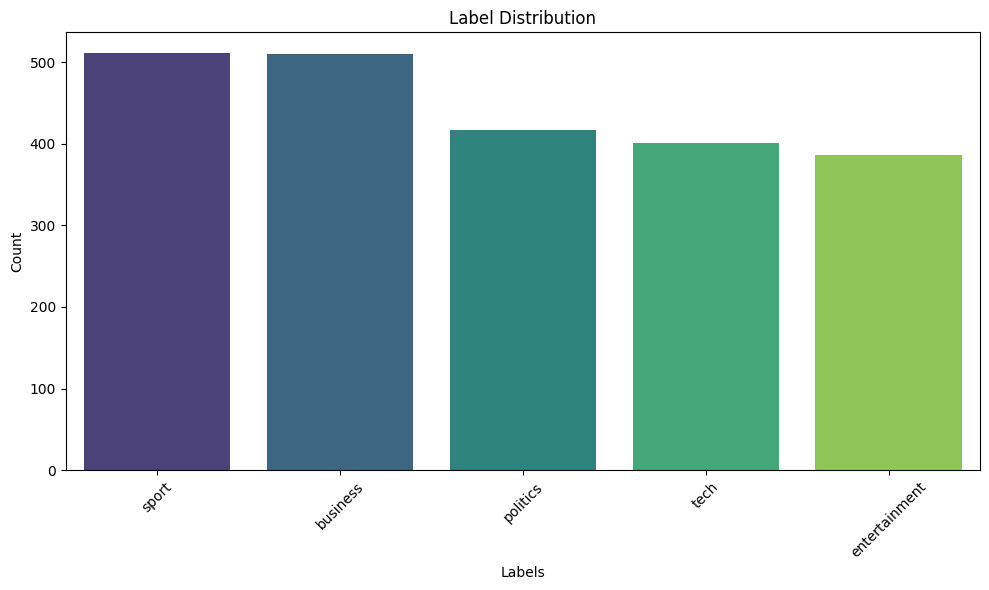

In [6]:
# Plot label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# 2. Data Preparation
X = data['data']
y = data['labels']

In [8]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Transform text data using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [9]:
# 3. Model Training
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# 4. Model Evaluation
predictions = model.predict(X_test_tfidf)

In [15]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       163
entertainment       0.97      0.96      0.97       120
     politics       0.95      0.99      0.97       112
        sport       1.00      0.99      1.00       148
         tech       1.00      0.96      0.98       125

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668



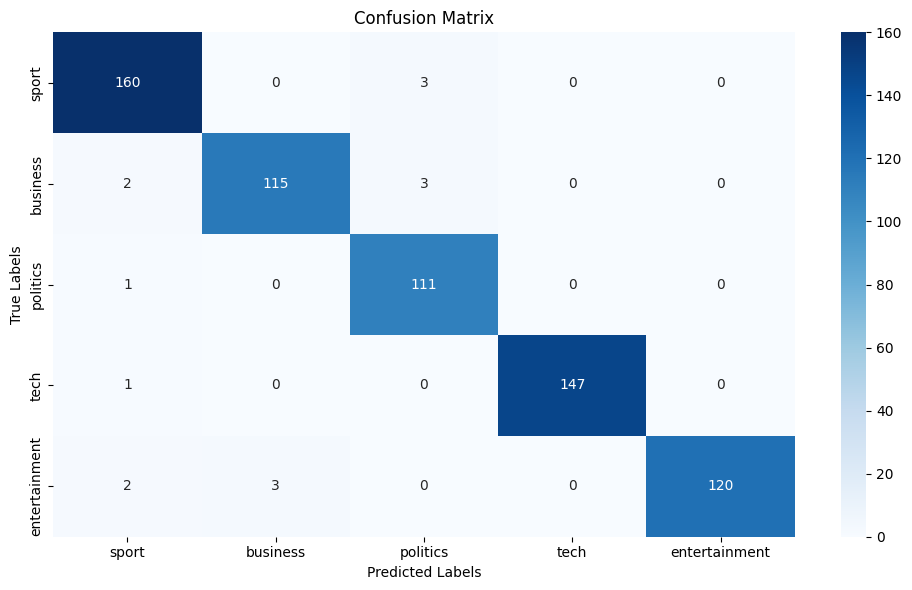

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_counts.index, yticklabels=label_counts.index)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

In [17]:
# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [23]:
# 5. Word Frequency Analysis
word_counts = tfidf.vocabulary_
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:20]


C:\Users\aisho\AppData\Local\Temp\ipykernel_20404\3050349558.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="magma")


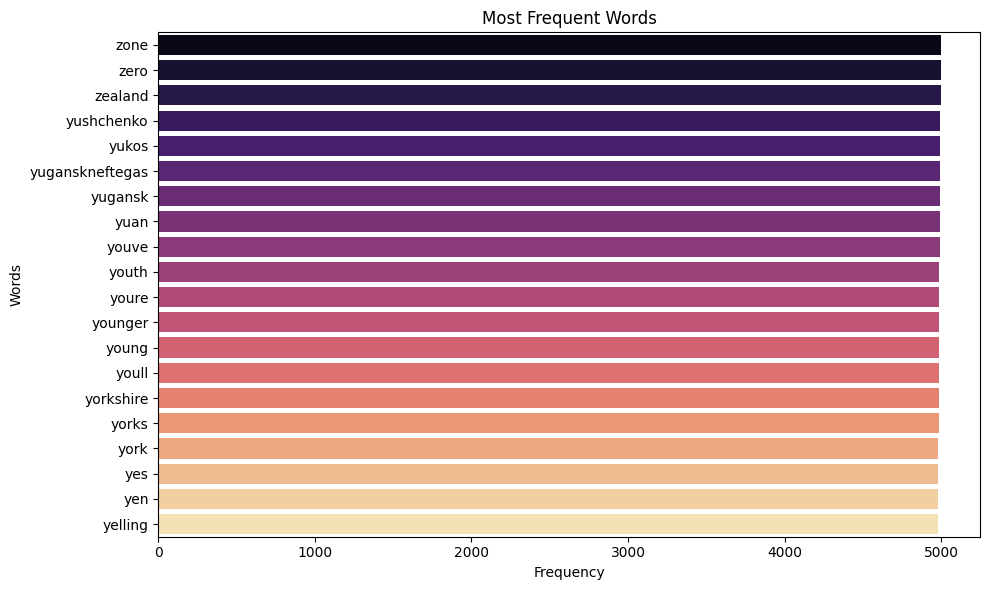

In [24]:
# Plot most frequent words
words, counts = zip(*sorted_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette="magma")
plt.title("Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()
